In [1]:
from API_webHMI import *
from defs import *
from head import headers, device_adress
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def conn():
    print('1: Connection Req\n')
    # displayHeader(headers)
    req1 = connectionList(device_adress, headers)  # pobranie listy polaczen plc.
    return req1

In [4]:
req1=conn()
connections=pd.DataFrame(req1)
connections['plcid']=connections['id']
connections.index=connections['id']
connections.head()

1: Connection Req



,addr,address_offset,allow_group,baudrate,bitscount,category,cloud_sync,description,device,disable_on_error,disable_regs_count,disable_scans_count,disable_timeout,disabled,group_limit,id,melsec_frame,melsec_moduleionumber,melsec_modulestationnumber,melsec_networknumber,melsec_pcnumber,melsec_port,mode,model,order_id,parity,port,protocol,regs_mtime,serialnumber,simulate,skipscanregscount,sku,stabilization,stopbit,timeout,title,tsap,unitid,variable,plcid
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,192.168.10.10,0,1,9600,8,0 RG,0,,/dev/rs485,0,3,2,10,0,5,1,0,1023,0,0,255,5012,0,2,0,e,503,2,1549607655,,0,50,,0,1,5000,APAR_30.1,301,1,,1
2,192.168.10.10,0,1,9600,8,0 RG,0,,/dev/rs485,0,3,2,10,0,5,2,0,1023,0,0,255,5012,0,2,0,e,503,2,1549607655,,0,50,,0,1,3000,APAR_31.2,301,2,,2
3,192.168.10.10,0,1,9600,8,0 RG,0,,/dev/rs485,0,3,2,10,0,5,3,0,1023,0,0,255,5012,0,2,0,e,503,2,1549607656,,0,50,,0,1,3000,APAR_32.3,301,3,,3
4,192.168.10.10,0,1,9600,8,0 RG,0,,/dev/rs485,0,3,2,10,0,5,4,0,1023,0,0,255,5012,0,2,0,e,503,2,1549607656,,0,50,,0,1,3000,APAR_33.4,301,4,,4
5,192.168.10.10,0,1,9600,8,0 RG,0,,/dev/rs485,0,3,2,10,0,5,5,0,1023,0,0,255,5012,0,2,0,e,503,2,1549607657,,0,50,,0,1,3000,APAR_34.5,301,5,,5


In [5]:
def reg():
    print('\n2 :Registers Req\n')
    # displayHeader(headers)  # wystarczy podstawowy naglowek
    req2 = registerList(device_adress, headers)  # odczytanie listy rejestrow
    return req2
registers=pd.DataFrame(reg())
registers.head()


2 :Registers Req



,addr,alert_color,category,delay,dictid,disabled,disabled_color,graph_color,has_alert,has_disabled,has_normal,has_warning,id,max_allowed_value,measureUnits,min_allowed_value,modbusAddr,normal_color,order_id,plcid,precision_digits,priority,save_graph_data,save_to_log,time_duration,timeformat,title,type,value_format,variable,warning_color
0,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,1,,%RH,,,#34d357,1,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518
1,HR7,#ee434d,,0,0,0,#cccccc,#aa55a1,0,0,0,0,2,,°C,,,#34d357,2,1,1,0,1,0,0,Y-m-d H:i:s,Temperatura,2,1,,#f0b518
2,HR8,#ee434d,,0,0,0,#cccccc,#fff450,0,0,0,0,3,,g/m3,,,#34d357,3,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc bezwgledna,2,1,,#f0b518
3,HR9,#ee434d,,0,0,0,#cccccc,#fcb540,0,0,0,0,4,,°C,,,#34d357,4,1,1,0,1,0,0,Y-m-d H:i:s,Punkt rosy/szronu,2,1,,#f0b518
4,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,5,,%RH,,,#34d357,1,2,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518


In [6]:
regList = pd.merge(registers,connections[['title','plcid']],on='plcid')
regList.index=regList['id']
regList.head()

,addr,alert_color,category,delay,dictid,disabled,disabled_color,graph_color,has_alert,has_disabled,has_normal,has_warning,id,max_allowed_value,measureUnits,min_allowed_value,modbusAddr,normal_color,order_id,plcid,precision_digits,priority,save_graph_data,save_to_log,time_duration,timeformat,title_x,type,value_format,variable,warning_color,title_y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,1,,%RH,,,#34d357,1,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518,APAR_30.1
2,HR7,#ee434d,,0,0,0,#cccccc,#aa55a1,0,0,0,0,2,,°C,,,#34d357,2,1,1,0,1,0,0,Y-m-d H:i:s,Temperatura,2,1,,#f0b518,APAR_30.1
3,HR8,#ee434d,,0,0,0,#cccccc,#fff450,0,0,0,0,3,,g/m3,,,#34d357,3,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc bezwgledna,2,1,,#f0b518,APAR_30.1
4,HR9,#ee434d,,0,0,0,#cccccc,#fcb540,0,0,0,0,4,,°C,,,#34d357,4,1,1,0,1,0,0,Y-m-d H:i:s,Punkt rosy/szronu,2,1,,#f0b518,APAR_30.1
5,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,5,,%RH,,,#34d357,1,2,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518,APAR_31.2


In [7]:
regList[regList['plcid']=='3']

,addr,alert_color,category,delay,dictid,disabled,disabled_color,graph_color,has_alert,has_disabled,has_normal,has_warning,id,max_allowed_value,measureUnits,min_allowed_value,modbusAddr,normal_color,order_id,plcid,precision_digits,priority,save_graph_data,save_to_log,time_duration,timeformat,title_x,type,value_format,variable,warning_color,title_y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,9,,%RH,,,#34d357,1,3,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518,APAR_32.3
10,HR7,#ee434d,,0,0,0,#cccccc,#aa55a1,0,0,0,0,10,,°C,,,#34d357,2,3,1,0,1,0,0,Y-m-d H:i:s,Temperatura,2,1,,#f0b518,APAR_32.3
11,HR8,#ee434d,,0,0,0,#cccccc,#fff450,0,0,0,0,11,,g/m3,,,#34d357,3,3,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc bezwgledna,2,1,,#f0b518,APAR_32.3
12,HR9,#ee434d,,0,0,0,#cccccc,#fcb540,0,0,0,0,12,,°C,,,#34d357,4,3,1,0,1,0,0,Y-m-d H:i:s,Punkt rosy/szronu,2,1,,#f0b518,APAR_32.3


In [8]:
regListEnable=regList[regList['disabled']=='0']
regListEnable.head()

,addr,alert_color,category,delay,dictid,disabled,disabled_color,graph_color,has_alert,has_disabled,has_normal,has_warning,id,max_allowed_value,measureUnits,min_allowed_value,modbusAddr,normal_color,order_id,plcid,precision_digits,priority,save_graph_data,save_to_log,time_duration,timeformat,title_x,type,value_format,variable,warning_color,title_y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,1,,%RH,,,#34d357,1,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518,APAR_30.1
2,HR7,#ee434d,,0,0,0,#cccccc,#aa55a1,0,0,0,0,2,,°C,,,#34d357,2,1,1,0,1,0,0,Y-m-d H:i:s,Temperatura,2,1,,#f0b518,APAR_30.1
3,HR8,#ee434d,,0,0,0,#cccccc,#fff450,0,0,0,0,3,,g/m3,,,#34d357,3,1,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc bezwgledna,2,1,,#f0b518,APAR_30.1
4,HR9,#ee434d,,0,0,0,#cccccc,#fcb540,0,0,0,0,4,,°C,,,#34d357,4,1,1,0,1,0,0,Y-m-d H:i:s,Punkt rosy/szronu,2,1,,#f0b518,APAR_30.1
5,HR6,#ee434d,,0,0,0,#cccccc,#0066b3,0,0,0,0,5,,%RH,,,#34d357,1,2,1,0,1,0,0,Y-m-d H:i:s,Wilgotnosc wzgledna,2,1,,#f0b518,APAR_31.2


In [9]:
def graphListReq():
    print('\n3 :Graph Req\n')
    # displayHeader(headers)  # wystarczy podstawowy naglowek
    req3 = graphList(device_adress, headers)
    return req3


In [10]:
graph=graphListReq()


3 :Graph Req



In [11]:
graphList=pd.DataFrame(graph)
graphList.index=graphList['id']
graphList

,category,height,id,max_val,max_val_second,min_val,min_val_second,priority,regs_values,title,zones_values
id,,,,,,,,,,,
1,0 RG,350,1,,,,,0,2^^^^#000066^1|6^^^^#000033^1|10^^^^#0000FF^1|...,Temperatura,[]
2,0 RG,350,2,100,,0,,0,1^^^^#000066^1|5^^^^#000033^1|9^^^^#0000FF^1|1...,Wilgotnosc,[]
3,1 Mieszkanie,350,3,,,,,0,22^^^^#000066^1|26^^^^#000033^1|45^^^^#0000FF^...,Temperatura,[]
4,1 Mieszkanie,350,4,100,,0,,0,21^^^^#000066^1|25^^^^#000033^1|44^^^^#0000FF^...,Wilgotnosc,[]
5,2 Mieszkanie,350,5,,,,,0,137^^^^#000066^1|145^^^^#0000FF^1|149^^^^#0000...,Temperatura,[]
6,2 Mieszkanie,350,6,,,,,0,136^^^^#000066^1|144^^^^#0000FF^1|148^^^^#0000...,Wilgotnosc,[]
7,3 Mieszkanie,350,7,,,,,0,253^^^^#000066^1|257^^^^#000033^1|261^^^^#0000...,Temperatura,[]
8,3 Mieszkanie,350,8,,,,,0,252^^^^#000066|256^^^^#000033|260^^^^#0000FF|2...,Wilgotnosc,
9,4 Mieszkanie,350,9,,,,,0,305^^^^#000066|309^^^^#000033|313^^^^#0000FF|3...,Temperatura,


In [68]:
from datetime import datetime

def graphDataReq(headers, k):
    print('\n4 :Graph Data Req\n')
    # displayHeader(headers)  # wystarczy podstawowy naglowek
    req4 = getGraph(device_adress, headers, k)  # odczytanie danych z wykresow
    return req4



def range(rok,miesiac,dzien):
    wh_slices = 400
    length = 3
    dt = datetime(rok,miesiac,dzien)
    unixtime = time.mktime(dt.timetuple())  # - time.timezone
    date = datetime.fromtimestamp(unixtime).strftime('%Y-%m-%d  %H:%M:%S')
    wh_start = int(unixtime)
    return wh_start, wh_slices, date, length

def head(wh_start, wh_slices, lenght):
    # Ustalenie nagłowka dla wykresu
    wh_stop = wh_start + lenght * 60 * 60 * 24
    headers['X-WH-CONNS'] = ''
    headers['X-WH-REGS'] = ''
    headers['X-WH-START'] = str(wh_start)
    headers['X-WH-END'] = str(wh_stop)
    headers['X-WH-SLICES'] = str(wh_slices)
    return headers

wh_start, wh_slices, date, lenght=range(2019,2,4)
headers = head(wh_start, wh_slices, lenght)

headers

{'X-WH-APIKEY': 'D606230FEB2CCF4A3520B334BE0E5A29C1311EB0',
 'Accept': 'application/json',
 'Content-Type': 'application/json',
 'X-WH-CONNS': '',
 'X-WH-START': '1549234800',
 'X-WH-END': '1549494000',
 'X-WH-REG-IDS': '',
 'X-WH-SLICES': '400',
 'X-WH-REGS': ''}

In [69]:
rawData=graphDataReq(headers,19)


4 :Graph Data Req



In [70]:
wiatr=pd.DataFrame(rawData)
wiatr['x'] = pd.to_datetime(wiatr['x'], unit='ms')
wiatr['x'].dtype

dtype('<M8[ns]')

In [71]:
old_names = wiatr.columns.tolist()
new_names = ['{}{}{}'.format(regList.loc[i,'title_x'],i,regList.loc[i,'title_y']) for i in old_names if i !='x']
wiatr.rename(columns=dict(zip(old_names, new_names)), inplace=True)
wiatr.head()

,Wilgotność3863FIF_38.9,Wilgotność3865FIF_39.10,Wilgotność3867FIF_40.11,Wilgotność3869FIF_41.12,x
0,89.000000;89.000000;89.000000,100.000000;100.000000;100.000000,91.000000;91.000000;91.000000,100.000000;100.000000;100.000000,2019-02-03 23:38:24
1,88.000000;88.612903;89.000000,100.000000;100.000000;100.000000,91.000000;91.000000;91.000000,100.000000;100.000000;100.000000,2019-02-03 23:49:12
2,88.000000;88.413793;89.000000,100.000000;100.000000;100.000000,91.000000;91.000000;91.000000,100.000000;100.000000;100.000000,2019-02-04 00:00:00
3,88.000000;88.966667;89.000000,100.000000;100.000000;100.000000,91.000000;91.000000;91.000000,100.000000;100.000000;100.000000,2019-02-04 00:10:48
4,89.000000;89.000000;89.000000,100.000000;100.000000;100.000000,91.000000;91.000000;91.000000,100.000000;100.000000;100.000000,2019-02-04 00:21:36


In [72]:
wind=pd.DataFrame(dict([(('Time',''),wiatr['x'])]))
dd=[wind]
# dd=[]
for i in wiatr.keys():
    if i!='x':
        vals=['min','avg','max']
        devs=wiatr[i].str.split(';', expand=True).rename(columns = lambda x:vals[x] )  
        dfp= pd.DataFrame(dict([
            ((i,'min'), devs['min'].astype('float')),
            ((i,'avg'), devs['avg'].astype('float')),
            ((i,'max'), devs['max'].astype('float')),
        ]))
        dd.append(dfp)
df = pd.concat(dd, axis=1)
df.set_index('Time', inplace=True)
# df.index=wiatr['x']
# df=df.reset_index()
# pd.merge(left=df, right=wind, left_index=True, right_index=True)

In [73]:
df

Wilgotność3863FIF_38.9                   \
                                       min        avg   max   
Time                                                          
2019-02-03 23:38:24                   89.0  89.000000  89.0   
2019-02-03 23:49:12                   88.0  88.612903  89.0   
2019-02-04 00:00:00                   88.0  88.413793  89.0   
2019-02-04 00:10:48                   88.0  88.966667  89.0   
2019-02-04 00:21:36                   89.0  89.000000  89.0   
2019-02-04 00:32:24                   89.0  89.000000  89.0   
2019-02-04 00:43:12                   89.0  89.000000  89.0   
2019-02-04 00:54:00                   89.0  89.166667  90.0   
2019-02-04 01:04:48                   89.0  89.000000  89.0   
2019-02-04 01:15:36                   89.0  89.000000  89.0   
2019-02-04 01:26:24                   89.0  89.000000  89.0   
2019-02-04 01:37:12                   89.0  89.000000  89.0   
2019-02-04 01:48:00                   89.0  89.000000  89.0   
2019-02-04 01:58:48                   89.0  89.000000  89.0   
2019-02-04 02:09:36                   89.0  89.000000  89.0   
2019-02-04 02:20:24                   89.0  89.000000  89.0   
2019-02-04 02:31:12                   89.0  89.000000  89.0   
2019-02-04 02:42:00                   89.0  89.000000  89.0   
2019-02-04 02:52:48                   89.0  89.000000  89.0   
2019-02-04 03:03:36                   89.0  89.000000  89.0   
2019-02-04 03:14:24                   89.0  89.000000  89.0   
2019-02-04 03:25:12                   89.0  89.000000  89.0   
2019-02-04 03:36:00                   89.0  89.000000  89.0   
2019-02-04 03:46:48                   89.0  89.000000  89.0   
2019-02-04 03:57:36                   89.0  89.000000  89.0   
2019-02-04 04:08:24                   89.0  89.137931  90.0   
2019-02-04 04:19:12                   89.0  89.300000  90.0   
2019-02-04 04:30:00                   89.0  89.300000  90.0   
2019-02-04 04:40:48                   89.0  89.827586  90.0   
2019-02-04 04:51:36                   89.0  89.900000  90.0   
2019-02-04 05:02:24                   90.0  90.000000  90.0   
2019-02-04 05:13:12                   90.0  90.000000  90.0   
2019-02-04 05:24:00                   90.0  90.000000  90.0   
2019-02-04 05:34:48                   90.0  90.448276  91.0   
2019-02-04 05:45:36                   91.0  91.000000  91.0   
2019-02-04 05:56:24                   91.0  91.000000  91.0   
2019-02-04 06:07:12                   90.0  90.285714  91.0   
2019-02-04 06:18:00                   89.0  89.827586  90.0   
2019-02-04 06:28:48                   89.0  89.827586  90.0   
2019-02-04 06:39:36                   89.0  89.133333  90.0   
2019-02-04 06:50:24                   89.0  89.533333  90.0   
2019-02-04 07:01:12                   89.0  89.000000  89.0   
2019-02-04 07:12:00                   89.0  89.000000  89.0   
2019-02-04 07:22:48                   89.0  89.103448  90.0   
2019-02-04 07:33:36                   89.0  89.000000  89.0   
2019-02-04 07:44:24                   89.0  89.000000  89.0   
2019-02-04 07:55:12                   88.0  88.000000  88.0   
2019-02-04 08:06:00                   87.0  87.000000  87.0   
2019-02-04 08:16:48                   87.0  87.000000  87.0   
2019-02-04 08:27:36                   87.0  87.000000  87.0   
2019-02-04 08:38:24                   86.0  86.375000  87.0   
2019-02-04 08:49:12                   86.0  86.000000  86.0   
2019-02-04 09:00:00                   86.0  86.000000  86.0   
2019-02-04 09:10:48                   86.0  86.000000  86.0   
2019-02-04 09:21:36                   86.0  86.000000  86.0   
2019-02-04 09:32:24                   86.0  86.000000  86.0   
2019-02-04 09:43:12                   86.0  86.000000  86.0   
2019-02-04 09:54:00                   85.0  85.172414  86.0   
2019-02-04 10:04:48                   83.0  83.931034  85.0   
2019-02-04 10:15:36                   83.0  83.033333  84.0   
2019-02-04 10:26:24                   83.0  83.0333

In [74]:
df.columns.tolist()

[('Wilgotność3863FIF_38.9', 'min'),
 ('Wilgotność3863FIF_38.9', 'avg'),
 ('Wilgotność3863FIF_38.9', 'max'),
 ('Wilgotność3865FIF_39.10', 'min'),
 ('Wilgotność3865FIF_39.10', 'avg'),
 ('Wilgotność3865FIF_39.10', 'max'),
 ('Wilgotność3867FIF_40.11', 'min'),
 ('Wilgotność3867FIF_40.11', 'avg'),
 ('Wilgotność3867FIF_40.11', 'max'),
 ('Wilgotność3869FIF_41.12', 'min'),
 ('Wilgotność3869FIF_41.12', 'avg'),
 ('Wilgotność3869FIF_41.12', 'max')]

In [75]:
list=[x for x in df.columns.tolist() if x[1]=='avg']
mask=df[list]
mask.head()


,Wilgotność3863FIF_38.9,Wilgotność3865FIF_39.10,Wilgotność3867FIF_40.11,Wilgotność3869FIF_41.12
,avg,avg,avg,avg
Time,,,,
2019-02-03 23:38:24,89.000000,100.0,91.0,100.0
2019-02-03 23:49:12,88.612903,100.0,91.0,100.0
2019-02-04 00:00:00,88.413793,100.0,91.0,100.0
2019-02-04 00:10:48,88.966667,100.0,91.0,100.0
2019-02-04 00:21:36,89.000000,100.0,91.0,100.0


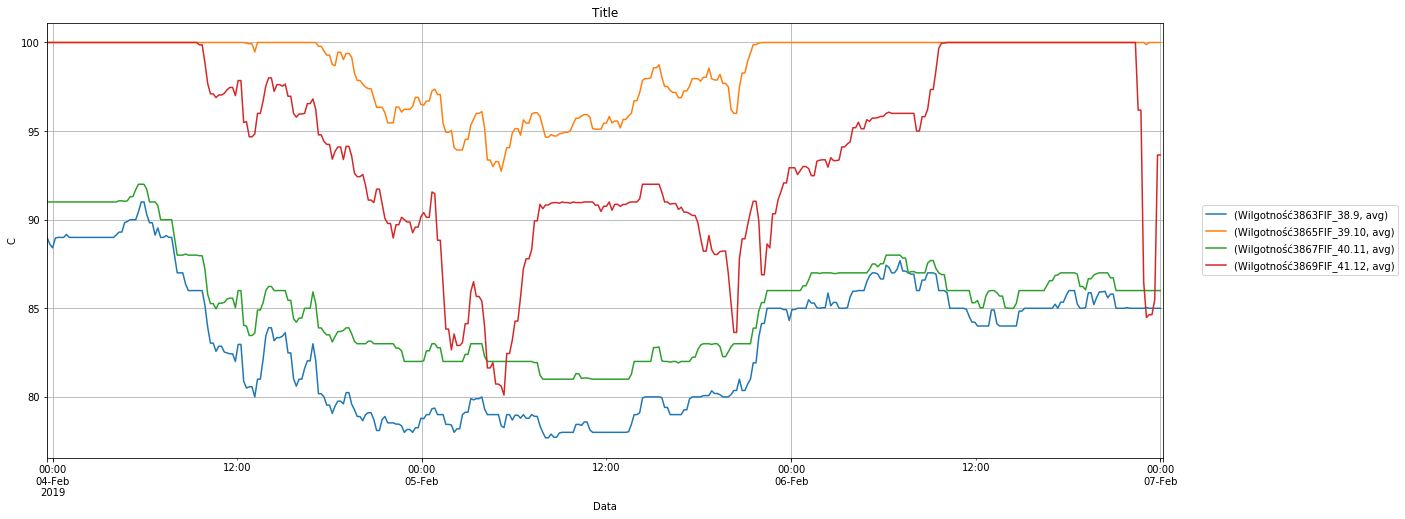

In [76]:
# plt.rcParams["figure.figsize"] = (20,10)
mask.plot(figsize=(20,8))
plt.title("Title")
plt.xlabel("Data")
plt.ylabel("C")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.03, 0.5))
plt.show()